In [1629]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import sys 
sys.path.insert(1, "../")
from workloads.util import use_results, use_dataset, read_config, log_dataset

import seaborn as sns
sns.set_theme(style="whitegrid")

In [1630]:
experiment = "ml-1m"
dataset_dir = use_dataset(experiment)
result_dir = use_results(experiment, download=False)

/data/wooders/ralf-vldb//datasets/ml-1m


In [1642]:
updates_per_ts = [None, 0.5, 0.2, 1, 2, 4]
ts_factor = [10, 100] #, 1000]
policies = ["total_error", "total_error_cold", "max_pending", "min_past", "round_robin"] #, "last_query"]

In [1657]:
limit = 50000 #100000

In [1658]:
updates_df = pd.DataFrame()
df_all = pd.DataFrame()
results = [] 

for p in policies: 
    for u in updates_per_ts: 
        for t in ts_factor: 
            update_df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_updates.csv")
            df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
            
            print(p, u, t, df.timestamp.max(), update_df["time"].max())
            
            if df.timestamp.max() < limit: 
                print(f"{result_dir}/{p}_{u}_{t}_results.csv")
                continue 
            
            # filter time 
            update_df = update_df[update_df["time"] < limit]
            df = df[df["timestamp"] < limit]
            
            
            df["policy"] = p
            df["updates"] = u 
            df["ts_factor"] = t
            update_df["updates"] = u 
            update_df["ts_factor"] = t
            
            # threshold predictions 
            df["y_pred"][df["y_pred"] > 5] = 5
            df["y_pred"][df["y_pred"] < 1] = 1
            
            #print(df.y_pred)
            #print(df.y_true)

            error = mean_squared_error(df.y_pred, df.y_true)
            
            #print(update_df.time.value_counts())
            

            total_updates = len(update_df.index)
            print(total_updates, len(df.index), error)
            results.append([u , p, error, total_updates, t, df.timestamp.max()])
            updates_df = pd.concat([updates_df, update_df])
            df_all = pd.concat([df_all, df])
      
results_df = pd.DataFrame(results, columns=["updates", "policy", "error", "total_updates", "ts_factor", "max_ts"])
results_df

total_error None 10 7343656 nan
0 15928 7.547849992937264


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


total_error None 100 734365 nan
0 396457 7.747198217632717
total_error 0.5 10 71000 70999


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1
/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value

5122 15928 1.097006573606892
total_error 0.5 100 19000 19000
/data/wooders/ralf-vldb//results/ml-1m/total_error_0.5_100_results.csv
total_error 0.2 10 103000 102996
2762 15928 1.1315136849602396


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


total_error 0.2 100 33000 32998
/data/wooders/ralf-vldb//results/ml-1m/total_error_0.2_100_results.csv
total_error 1 10 113000 113000
6290 15928 1.0889998319316747


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


total_error 1 100 25000 25000
/data/wooders/ralf-vldb//results/ml-1m/total_error_1_100_results.csv
total_error 2 10 103000 103000
6838 15928 1.0874243463216875


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


total_error 2 100 17000 17000
/data/wooders/ralf-vldb//results/ml-1m/total_error_2_100_results.csv
total_error 4 10 106000 106000
6849 15928 1.0874243586730312


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


total_error 4 100 16000 16000
/data/wooders/ralf-vldb//results/ml-1m/total_error_4_100_results.csv
total_error_cold None 10 7343656 nan
0 15928 7.547849992937264


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


total_error_cold None 100 734365 nan
0 396457 7.747198217632717


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


total_error_cold 0.5 10 71000 70999
5122 15928 1.094140881431288


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


total_error_cold 0.5 100 21000 21000
/data/wooders/ralf-vldb//results/ml-1m/total_error_cold_0.5_100_results.csv
total_error_cold 0.2 10 113000 113000
2762 15928 1.1210684309360979


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


total_error_cold 0.2 100 52000 51996
6301 396457 3.0408965692433485


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


total_error_cold 1 10 103000 103000
6290 15928 1.0884394752393622


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


total_error_cold 1 100 22000 22000
/data/wooders/ralf-vldb//results/ml-1m/total_error_cold_1_100_results.csv
total_error_cold 2 10 106000 106000
6837 15928 1.0874243505575394


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


total_error_cold 2 100 17000 17000
/data/wooders/ralf-vldb//results/ml-1m/total_error_cold_2_100_results.csv
total_error_cold 4 10 103000 103000
6849 15928 1.0874243586730312


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


total_error_cold 4 100 16000 16000
/data/wooders/ralf-vldb//results/ml-1m/total_error_cold_4_100_results.csv
max_pending None 10 7343656 nan
0 15928 7.547849992937264


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


max_pending None 100 734365 nan
0 396457 7.747198217632717


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


max_pending 0.5 10 61000 61000
5122 15928 1.105702554142915


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


max_pending 0.5 100 22000 21999
/data/wooders/ralf-vldb//results/ml-1m/max_pending_0.5_100_results.csv
max_pending 0.2 10 106000 105998
2762 15928 1.2321885081322987


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


max_pending 0.2 100 45000 44998
/data/wooders/ralf-vldb//results/ml-1m/max_pending_0.2_100_results.csv
max_pending 1 10 116000 116000
6290 15928 1.0904770755942226


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


max_pending 1 100 22000 22000
/data/wooders/ralf-vldb//results/ml-1m/max_pending_1_100_results.csv
max_pending 2 10 116000 116000


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


6834 15928 1.0874243761033242
max_pending 2 100 17000 17000
/data/wooders/ralf-vldb//results/ml-1m/max_pending_2_100_results.csv
max_pending 4 10 98000 98000


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


6849 15928 1.0874243586730312
max_pending 4 100 16000 16000
/data/wooders/ralf-vldb//results/ml-1m/max_pending_4_100_results.csv
min_past None 10 7343656 nan
0 15928 7.547849992937264


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


min_past None 100 734365 nan
0 396457 7.747198217632717


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


min_past 0.5 10 64000 64000
5122 15928 1.0959353693833946


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


min_past 0.5 100 20000 19999
/data/wooders/ralf-vldb//results/ml-1m/min_past_0.5_100_results.csv
min_past 0.2 10 136000 136000
2762 15928 1.1236424109747143


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


min_past 0.2 100 45000 44998
/data/wooders/ralf-vldb//results/ml-1m/min_past_0.2_100_results.csv
min_past 1 10 103000 103000
6290 15928 1.0889886308785433


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


min_past 1 100 21000 21000
/data/wooders/ralf-vldb//results/ml-1m/min_past_1_100_results.csv
min_past 2 10 90000 90000
6826 15928 1.0874244519090674


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


min_past 2 100 18000 18000
/data/wooders/ralf-vldb//results/ml-1m/min_past_2_100_results.csv
min_past 4 10 103000 103000
6849 15928 1.0874243586730312


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


min_past 4 100 15000 15000
/data/wooders/ralf-vldb//results/ml-1m/min_past_4_100_results.csv
round_robin None 10 7343656 nan
0 15928 7.547849992937264


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


round_robin None 100 734365 nan
0 396457 7.747198217632717


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


round_robin 0.5 10 81000 81000
5122 15928 1.1104465850512812


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


round_robin 0.5 100 21000 21000
/data/wooders/ralf-vldb//results/ml-1m/round_robin_0.5_100_results.csv
round_robin 0.2 10 116000 115996
2762 15928 1.1788214013152238


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


round_robin 0.2 100 42000 41999
/data/wooders/ralf-vldb//results/ml-1m/round_robin_0.2_100_results.csv
round_robin 1 10 113000 113000
6290 15928 1.0973261803225187


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


round_robin 1 100 22000 22000
/data/wooders/ralf-vldb//results/ml-1m/round_robin_1_100_results.csv
round_robin 2 10 106000 106000
6827 15928 1.08858271940303


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


round_robin 2 100 17000 17000
/data/wooders/ralf-vldb//results/ml-1m/round_robin_2_100_results.csv
round_robin 4 10 116000 116000
6849 15928 1.0874243586730312


/tmp/ipykernel_2322980/3011018656.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3011018656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1


round_robin 4 100 16000 16000
/data/wooders/ralf-vldb//results/ml-1m/round_robin_4_100_results.csv


,updates,policy,error,total_updates,ts_factor,max_ts
0,NaN,total_error,7.547850,0,10,47752
1,NaN,total_error,7.747198,0,100,49987
2,0.5,total_error,1.097007,5122,10,47752
3,0.2,total_error,1.131514,2762,10,47752
4,1.0,total_error,1.089000,6290,10,47752
5,2.0,total_error,1.087424,6838,10,47752
6,4.0,total_error,1.087424,6849,10,47752
7,NaN,total_error_cold,7.547850,0,10,47752
8,NaN,total_error_cold,7.747198,0,100,49987
9,0.5,total_error_cold,1.094141,5122,10,47752


In [1659]:
df_all

,Unnamed: 0,y_true,y_pred,user_id,movie_id,timestamp,policy,updates,ts_factor
0,0,4,3.957745,2783,1396,0,total_error,None,10
1,1,5,3.664955,2783,2901,0,total_error,None,10
2,2,4,3.266024,3970,3408,10,total_error,None,10
3,3,4,3.300188,3970,2890,12,total_error,None,10
4,4,4,1.000000,2782,2580,61,total_error,None,10
...,...,...,...,...,...,...,...,...,...
15923,15923,4,3.228047,2986,2712,47432,round_robin,4,10
15924,15924,4,4.024092,2986,1287,47444,round_robin,4,10
15925,15925,4,3.915727,2986,154,47444,round_robin,4,10
15926,15926,4,3.980612,2986,1952,47489,round_robin,4,10


In [1663]:
results_df[results_df["ts_factor"] == 10]

,updates,policy,error,total_updates,ts_factor,max_ts
0,NaN,total_error,7.547850,0,10,47752
2,0.5,total_error,1.097007,5122,10,47752
3,0.2,total_error,1.131514,2762,10,47752
4,1.0,total_error,1.089000,6290,10,47752
5,2.0,total_error,1.087424,6838,10,47752
6,4.0,total_error,1.087424,6849,10,47752
7,NaN,total_error_cold,7.547850,0,10,47752
9,0.5,total_error_cold,1.094141,5122,10,47752
10,0.2,total_error_cold,1.121068,2762,10,47752
12,1.0,total_error_cold,1.088439,6290,10,47752


/tmp/ipykernel_2322980/2036452596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df.policy = plot_df.policy.map({


[Text(0.5, 1.0, 'Prediction Accuracy per Policy (Recommendation)'),
 Text(0.5, 12.5, 'Updates per Timestep'),
 Text(46.75, 0.5, 'Log MSE')]

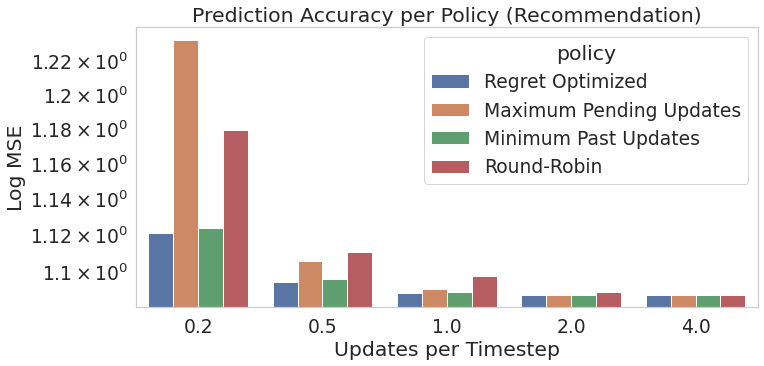

In [1661]:
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
plt.tight_layout()
sns.set_theme(style="whitegrid", font_scale=1.7)
ts_factor_filter = 10

plot_df = results_df[(results_df["ts_factor"] == ts_factor_filter) & (results_df.policy.isin(["total_error_cold", "min_past", "round_robin", "max_pending", "last_query"]))]
plot_df.policy = plot_df.policy.map({
    'total_error_cold': 'Regret Optimized', 
    'min_past': 'Minimum Past Updates', 
    'round_robin': "Round-Robin", 
    'max_pending': "Maximum Pending Updates", 
    'last_query': "Read-Optimized"
})
plot_df = plot_df.dropna()
sns.barplot(x="updates", y="error", hue="policy", data=plot_df, log=True, ax=ax)
ax.set(title="Prediction Accuracy per Policy (Recommendation)", xlabel="Updates per Timestep",  ylabel="Log MSE")

   index  updates                policy     error  total_updates  ts_factor
0      6        1      Regret Optimized  1.079621          11920         10
1      8        2      Regret Optimized  1.079221          12920         10
2     10        4      Regret Optimized  1.079221          12943         10
3     18        1  Minimum Past Updates  1.080055          11920         10
4     20        2  Minimum Past Updates  1.079221          12907         10
5     22        4  Minimum Past Updates  1.079221          12943         10


/tmp/ipykernel_2322980/1189420623.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df.policy = plot_df.policy.map({


[Text(0.5, 1.0, 'Prediction Accuracy per Policy (Recommendation)'),
 Text(0.5, 18.5, 'Updates per Timestep'),
 Text(359.86363636363626, 0.5, 'MSE')]

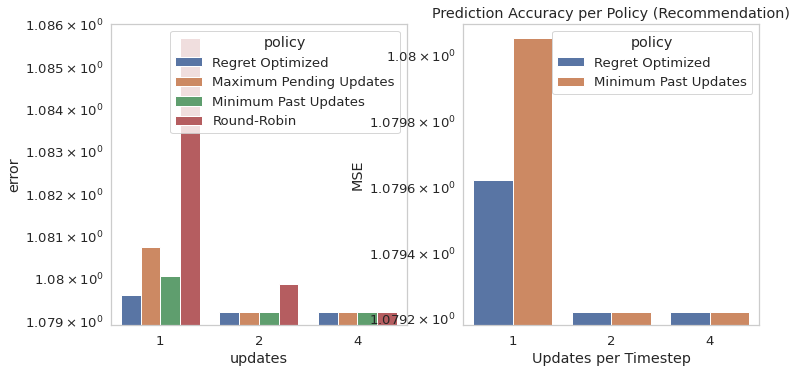

In [1253]:
f, ax = plt.subplots(ncols=2, figsize=(10, 5))
plt.tight_layout()
sns.set_theme(style="whitegrid", font_scale=1.2)
ts_factor = 10 

plot_df = results_df[(results_df["ts_factor"] == 10) & (results_df.policy.isin(["total_error_cold", "min_past", "round_robin", "max_pending", "last_query"]))]
plot_df.policy = plot_df.policy.map({
    'total_error_cold': 'Regret Optimized', 
    'min_past': 'Minimum Past Updates', 
    'round_robin': "Round-Robin", 
    'max_pending': "Maximum Pending Updates", 
    'last_query': "Read-Optimized"
})
plot_df = plot_df.dropna()
sns.barplot(x="updates", y="error", hue="policy", data=plot_df, log=True, ax=ax[0])

plot_df = plot_df[plot_df.policy.isin(['Minimum Past Updates', 'Regret Optimized'])].reset_index()
print(plot_df)
sns.barplot(x="updates", y="error", hue="policy", data=plot_df, log=True, ax=ax[1])

ax[1].set(title="Prediction Accuracy per Policy (Recommendation)", xlabel="Updates per Timestep",  ylabel="Log MSE")
ax[1].set(title="Prediction Accuracy per Policy (Recommendation)", xlabel="Updates per Timestep",  ylabel="MSE")
#plt.legend(np.flip(plot_df['policy'].unique()), loc='upper right', title="Event Type")

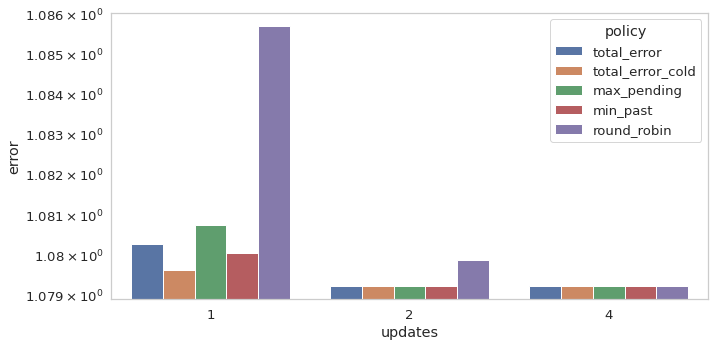

In [1238]:
ax = sns.barplot(x="updates", y="error", hue="policy", data=results_df[results_df["ts_factor"] == 10], log=True)

In [1239]:
updates_df.key.value_counts()

2777    6269
2565    4279
2664    4067
2665    3890
2643    3878
        ... 
751        1
750        1
758        1
874        1
4933       1
Name: key, Length: 2291, dtype: int64

In [1240]:
updates_df[(updates_df["time"] > ts_min) & (updates_df["time"] < ts_max) & (updates_df["updates"] == updates) & (updates_df["ts_factor"] == 10)].key.value_counts()

2777    1022
2776     770
2774     645
2771     321
2779     304
2769     255
2773     175
2782     152
2781     133
5428     113
2768     111
2784      95
2770      89
2772      80
2780      78
2918      70
3650      69
2791      45
2778      30
3993      15
4950      15
3051      14
2775      10
3504      10
5620      10
3970      10
4089       5
3519       5
5996       5
2898       5
4030       5
4448       5
3971       4
Name: key, dtype: int64

In [1241]:
df_all[(df_all.index > ts_min) & (df_all.index < ts_max) & (df_all["updates"] == updates) & (df_all["ts_factor"] == 10)].user_id.value_counts()

2777    4035
2761    2415
2743    2195
2753    2030
2737    1995
        ... 
3688       5
4448       5
3020       5
3693       5
2783       5
Name: user_id, Length: 124, dtype: int64

In [1181]:
updates_df

,Unnamed: 0,policy,runtime,key,i,time,updates,ts_factor
0,0,total_error,1.00,2783,0,0,1,10
1,1,total_error,1.00,3970,0,10,1,10
2,2,total_error,1.00,3970,1,12,1,10
3,3,total_error,1.00,2782,0,61,1,10
4,4,total_error,1.00,2782,1,63,1,10
...,...,...,...,...,...,...,...,...
12350,12350,round_robin,0.25,2157,0,15997,4,100
12351,12351,round_robin,0.25,2157,1,16000,4,100
12352,12352,round_robin,0.25,2156,0,15997,4,100
12353,12353,round_robin,0.25,2156,1,15998,4,100


In [1298]:
ts_min = 35000
ts_max = 40000
updates=1

<AxesSubplot:xlabel='timestamp'>

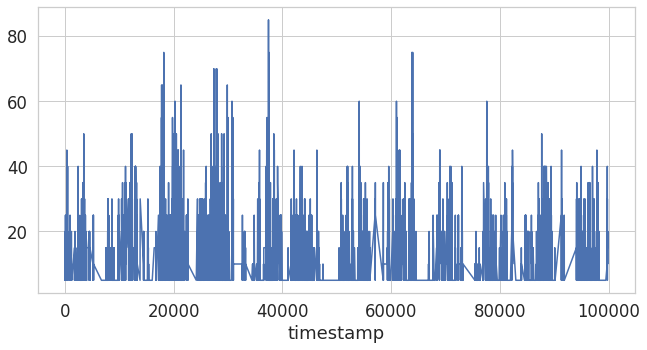

In [1297]:
df_all[(df_all["updates"] == updates) & (df_all["ts_factor"] == 10)].groupby("timestamp").updates.count().plot()


In [1299]:
hist_df = updates_df[(updates_df["time"] > ts_min) & (updates_df["time"] < ts_max) & (updates_df["updates"] == updates) & (updates_df["ts_factor"] == 10)].groupby(by=["key", "policy"]).updates.count().reset_index()
hist_df["user_id"] = hist_df["key"]
hist_df["policy"] = hist_df.policy.map({
    'total_error_cold': 'Accuracy Optimized', 
    'min_past': 'Minimum Past Updates', 
    'round_robin': "Round Robin", 
    'max_pending': "Maximum Pending"
})
hist_df = hist_df.dropna()
hist_df.user_id.value_counts()

samples_df = df_all[(df_all["timestamp"] > ts_min) & (df_all.index < ts_max) & (df_all["updates"] == updates) & (df_all["ts_factor"] == 10)]\
    .groupby(by=["user_id", "policy"])\
    .ts_factor.count()\
    .to_frame(name="samples")\
    .reset_index()

In [1300]:
# samples_df = df_all[(df_all.index > ts_min) & (df_all.index < ts_max) & (df_all["updates"] == updates) & (df_all["ts_factor"] == 10)].groupby(by=["user_id", "policy"]).ts_factor.count().to_frame(name="samples")
# ratio_df = pd.DataFrame(samples_df).join(hist_df.set_index(["user_id", "policy"]), on=["user_id", "policy"]).reset_index()
# hist_df = updates_df[(updates_df["time"] > ts_min) & (updates_df["time"] < ts_max) & (updates_df["updates"] == updates) & (updates_df["ts_factor"] == 10)].groupby(by=["key", "policy"]).updates.count().reset_index()
# hist_df["user_id"] = hist_df["key"]
# print(ratio_df)
# ratio_df["policy"] = ratio_df.policy.map({
#     'total_error_cold': 'Accuracy Optimized', 
#     'min_past': 'Minimum Past Updates', 
#     'round_robin': "Round Robin", 
#     'max_pending': "Maximum Pending"
# })
# ratio_df = ratio_df.dropna().reset_index()
# ratio_df["ratio"] = ratio_df.apply(lambda x: x["updates"]/x["samples"], axis=1)

# sns.set_theme(style="whitegrid", font_scale=1.5)
# g = sns.histplot(data=ratio_df, x="updates", hue="policy", discrete=False)
# g.set(title="Distribution of Updates Across Keys", xlabel="Scheduled Updates per Key",  ylabel="Number Keys")

In [1301]:
heat_df = hist_df.pivot("policy", "user_id", "updates").sort_values("Round Robin", axis=1, ascending=False).fillna(0)
heat_df

user_id,2681,2676,2736,2674,2679,2685,2680,2677,2682,3888,...,2687,2907,5322,5520,4656,4823,4829,4950,5241,5737
policy,,,,,,,,,,,,,,,,,,,,,
Accuracy Optimized,80.0,73.0,57.0,64.0,61.0,62.0,58.0,27.0,25.0,22.0,...,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
Maximum Pending,77.0,74.0,50.0,64.0,63.0,62.0,61.0,28.0,25.0,26.0,...,3.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0
Minimum Past Updates,79.0,77.0,62.0,64.0,56.0,62.0,49.0,29.0,25.0,26.0,...,3.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0
Round Robin,76.0,73.0,69.0,64.0,63.0,62.0,48.0,26.0,25.0,24.0,...,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


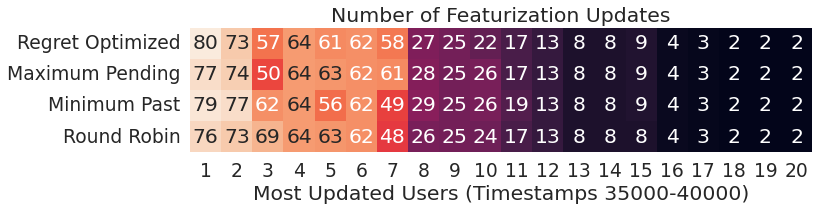

In [1325]:
heat_df = hist_df.pivot("policy", "user_id", "updates").sort_values("Round Robin", axis=1, ascending=False).fillna(0)
f, ax = plt.subplots(figsize=(10, 5))
plt.tight_layout()
sns.set_theme(style="whitegrid", font_scale=1.7)

sns.heatmap(
    heat_df.iloc[:, :20], 
    annot=True, 
    cbar=False,  
    yticklabels=["Regret Optimized", "Maximum Pending", "Minimum Past", "Round Robin"],
    xticklabels=range(1, 21, 1),
    square=True,
    ax=ax
)
ax.set_xlabel(f"Most Updated Users (Timestamps {ts_min}-{ts_max})")
ax.set_ylabel(None)
ax.set_title("Number of Featurization Updates")
#plt.legend(fontsize='x-large')
f.savefig('/data/wooders/ralf-vldb/plots/als_heatmap.pdf', dpi=300, bbox_inches = "tight")

Int64Index([2564, 2555, 2559, 2562, 2552, 2778, 2557, 2556, 2561, 2558, 2554,
            2551, 2560, 2563, 2553, 3423, 2584, 2748, 4937, 5267],
           dtype='int64', name='user_id')
    User  Raw Data Updates
0      1               120
1      2               154
2      3               158
3      4               171
4      5                80
5      6                94
6      7                58
7      8                47
8      9                70
9     10                48
10    11                39
11    12                76
12    13                40
13    14                27
14    15                23
15    16                 4
16    17                 3
17    18                 4
18    19                 2
19    20                 9


<AxesSubplot:xlabel='User', ylabel='Raw Data Updates'>

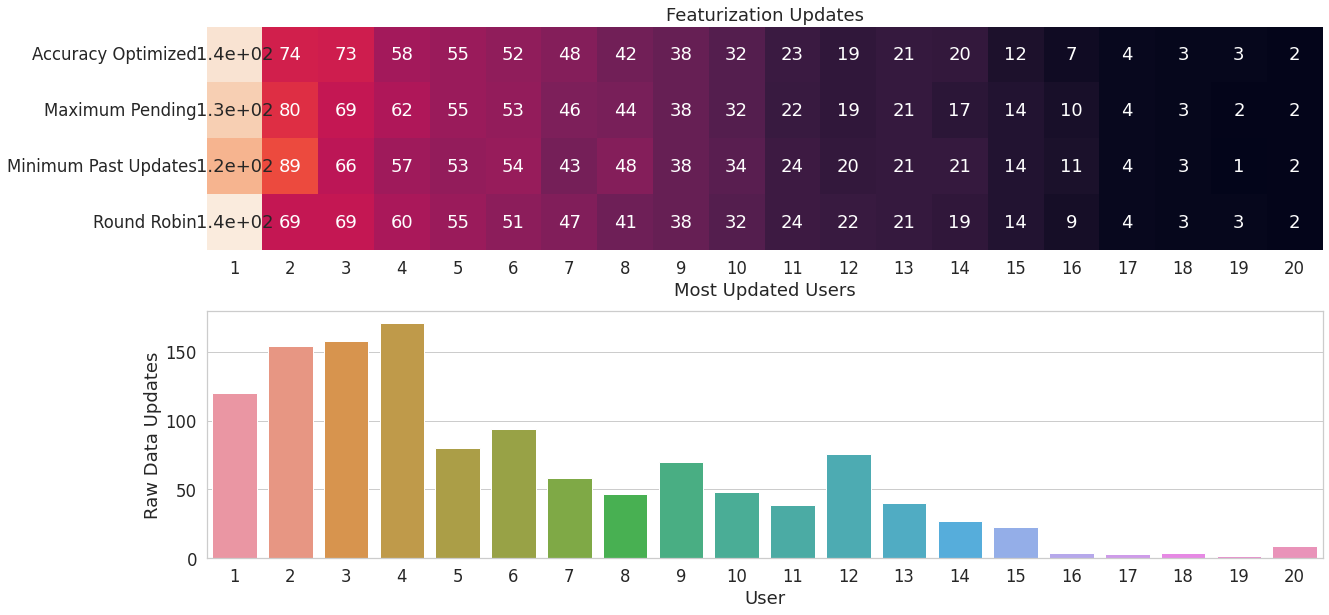

In [1286]:
heat_df = hist_df.pivot("policy", "user_id", "updates").sort_values("Round Robin", axis=1, ascending=False).fillna(0)
f, ax = plt.subplots(nrows=2, figsize=(20, 10))
sns.heatmap(
    heat_df.iloc[:, :20], 
    annot=True, 
    cbar=False,  
    #yticklabels=["Regret Optimized", "Minimum Past", "Round Robin"],
    xticklabels=range(1, 21, 1),
    square=True,
    ax=ax[0]
)
ax[0].set_xlabel("Most Updated Users")
ax[0].set_ylabel(None)
ax[0].set_title("Featurization Updates")

users = heat_df.columns[1:21]
print(users)
samples = [samples_df[samples_df["user_id"] == u].samples.max() for u in users]
d = pd.DataFrame({"User": range(1, 21, 1), "Raw Data Updates": samples})
print(d)
#d = pd.DataFrame([samples], columns=users, index=["Total Data Points"])
sns.barplot(data=d, x="User", y="Raw Data Updates", ax=ax[1])
#ax[1].set_ylabel(None)
#ax[1].set_title("Raw Data Updates Updates")

<AxesSubplot:xlabel='time', ylabel='Count'>

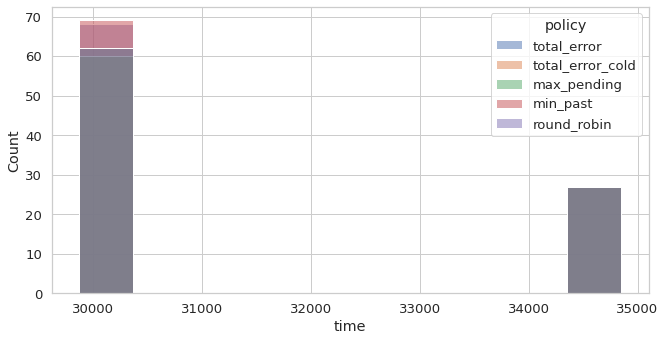

In [1221]:
key_df = updates_df[(updates_df["key"] == 2693) & (updates_df["ts_factor"] == 10) & (updates_df["updates"] == 1)]
key_df = key_df.set_index(["time", "policy"]).reset_index()
sns.histplot(key_df, x="time", hue="policy")

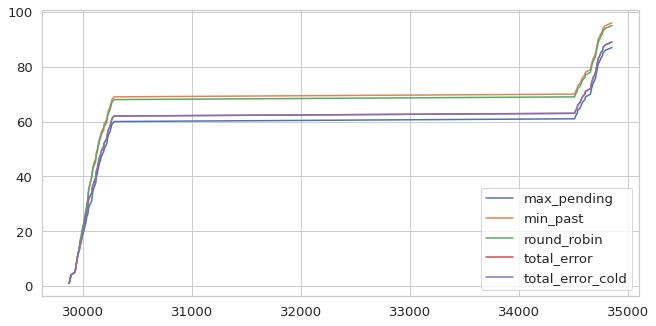

In [1222]:
for (i, (key, group)) in enumerate(key_df.groupby("policy")):
    group = group.time.tolist()
    x = group
    y = range(1, len(group) + 1, 1)
    plt.plot(x, y, label=key)
plt.legend()
    

In [1223]:
samples_df[samples_df["user_id"] == 3437]

,user_id,policy,samples


Text(0.5, 1.0, 'Featurization Updates')

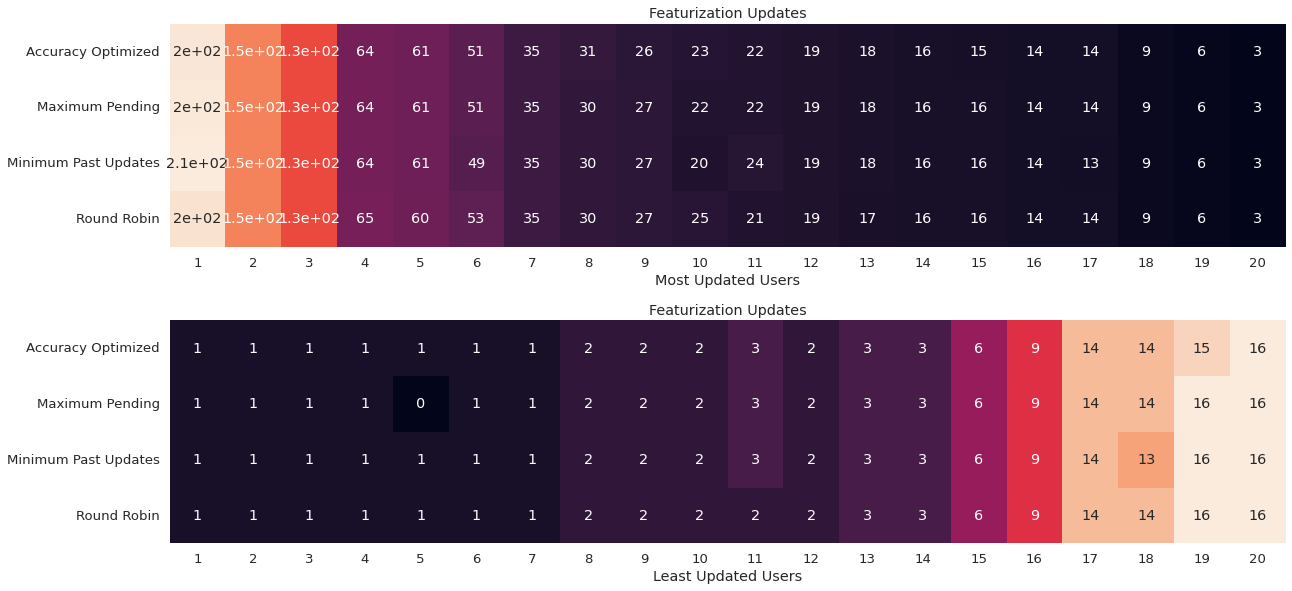

In [1224]:
heat_df = hist_df.pivot("policy", "user_id", "updates").sort_values("Round Robin", axis=1, ascending=False).fillna(0)
f, ax = plt.subplots(nrows=2, figsize=(20, 10))
sns.heatmap(
    heat_df.iloc[:, :20], 
    annot=True,
    cbar=False,  
    #yticklabels=["Regret Optimized", "Minimum Past", "Round Robin"],
    xticklabels=range(1, 21, 1),
    square=True,
    ax=ax[0]
)
ax[0].set_xlabel("Most Updated Users")
ax[0].set_ylabel(None)
ax[0].set_title("Featurization Updates")

heat_df = hist_df.pivot("policy", "user_id", "updates").sort_values("Round Robin", axis=1, ascending=True).fillna(0)
sns.heatmap(
    heat_df.iloc[:, :20], 
    annot=True, 
    cbar=False,  
    #yticklabels=["Regret Optimized", "Minimum Past", "Round Robin"],
    xticklabels=range(1, 21, 1),
    square=True,
    ax=ax[1]
)
ax[1].set_xlabel("Least Updated Users")
ax[1].set_ylabel(None)
ax[1].set_title("Featurization Updates")

In [ ]:
users = heat_df.columns[1:21]
samples = [ratio_df[ratio_df["user_id"] == u].samples.max() for u in users]
d = pd.DataFrame({"User": range(1, 21, 1), "Raw Data Updates": samples})
print(d)
#d = pd.DataFrame([samples], columns=users, index=["Total Data Points"])
sns.barplot(data=d, x="User", y="Raw Data Updates")

<AxesSubplot:xlabel='user_id', ylabel='policy'>

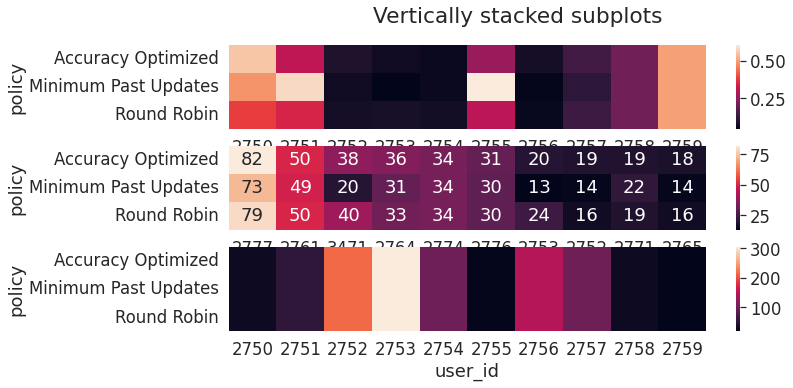

In [793]:
#f, ax = plt.subplots(figsize=(20, 2))

#fig, axs = plt.subplots(2, figsize=(20, 6))
fig, axs = plt.subplots(nrows=3)

fig.suptitle('Vertically stacked subplots')

heat_df = ratio_df.pivot("policy", "user_id", "ratio").fillna(0)
sns.heatmap(heat_df.iloc[:, :10], ax=axs[0]) #, square=True, annot=True, cbar=False)

heat_df = ratio_df.pivot("policy", "user_id", "updates").sort_values("Accuracy Optimized", axis=1, ascending=False).fillna(0)
sns.heatmap(heat_df.iloc[:, :10], ax=axs[1], annot=True)

heat_df = ratio_df.pivot("policy", "user_id", "samples").fillna(0)
sns.heatmap(heat_df.iloc[:, :10], ax=axs[2])


374.0
round_robin         22201
total_error         22201
total_error_cold    22201
max_pending         21754
min_past            21307
Name: policy, dtype: int64
policy     Round Robin
key               5996
user_id           5996
updates          374.0
dtype: object


[Text(0.5, 1.0, 'Distribution of Updates Across Keys'),
 Text(0.5, 0, 'Scheduled Updates per Key'),
 Text(0, 0.5, 'Number Keys')]

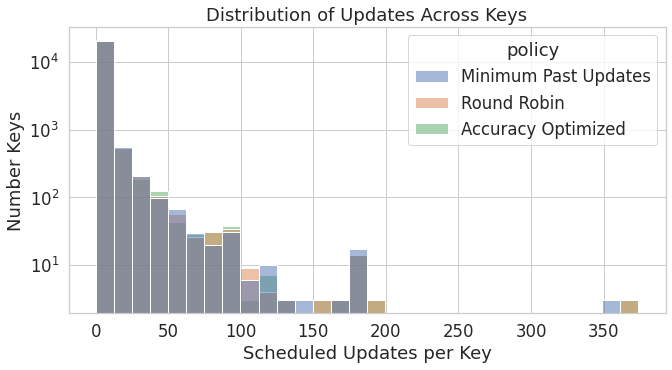

In [566]:
runtime = 1.0
sns.set(rc={'figure.figsize':(10.7,5.27)})
hist_df = updates_df[updates_df["runtime"] == runtime].groupby(by=["key", "policy"]).size()
hist_df = hist_df / samples_df
print(hist_df.max())
hist_df = hist_df.to_frame(name="updates").reset_index()
print(hist_df.policy.value_counts())
hist_df["policy"] = hist_df.policy.map({'total_error_cold': 'Accuracy Optimized', 'min_past': 'Minimum Past Updates', 'round_robin': "Round Robin"})
hist_df = hist_df.dropna()
print(hist_df.max())

sns.set_theme(style="whitegrid", font_scale=1.5)
g = sns.histplot(data=hist_df, x="updates", hue="policy", log_scale=(False, True), discrete=False, bins=30)
g.set(title="Distribution of Updates Across Keys", xlabel="Scheduled Updates per Key",  ylabel="Number Keys")

In [ ]:
updates_df[(updates_df["policy"] == "total_error") & (updates_df["runtime"] == 1.00)]

# Plot Dataset

In [923]:
factor = 100

In [924]:
test_df = pd.read_csv(f'{dataset_dir}/stream.csv')
train_df = pd.read_csv(f'{dataset_dir}/train.csv')
start_ts = test_df.timestamp.min()
past_updates = pickle.load(open(f"{result_dir}/past_updates.pkl", "rb"))
test_df.timestamp = test_df.timestamp.apply(lambda ts: int((ts - start_ts)/factor))

In [925]:
new_user_df = test_df[test_df.user_id.isin(past_updates.keys())]
old_user_df = test_df[~test_df.user_id.isin(past_updates.keys())]

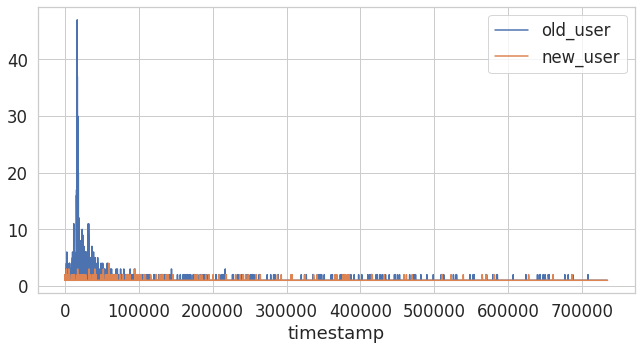

In [926]:
old_user_df.groupby(by="timestamp").user_id.nunique().plot(label="old_user").legend()
new_user_df.groupby(by="timestamp").user_id.nunique().plot(label="new_user").legend()

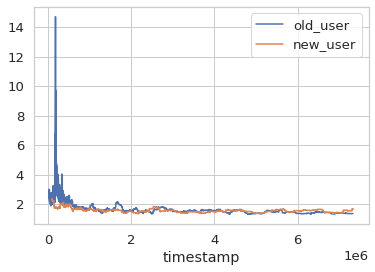

In [387]:
old_user_df.groupby(by="timestamp").rating.count().rolling(1000).mean().plot(label="old_user")
new_user_df.groupby(by="timestamp").rating.count().rolling(1000).mean().plot(label="new_user").legend()

<AxesSubplot:xlabel='timestamp'>

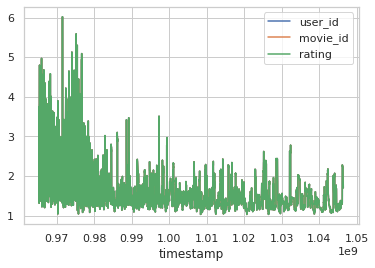

In [328]:
test_df.groupby(by="timestamp").count().rolling(window=100).mean().plot()

In [ ]:
train_df.movie_id.value_counts()

In [ ]:
test_df.movie_id.value_counts()

# Results Over Time 

In [ ]:
results[0]

/tmp/ipykernel_2322980/1755252222.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["square_error"] = df.y_pred - df.y_true
/tmp/ipykernel_2322980/1755252222.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["square_error"] = df["square_error"].apply(lambda x: x*x)


1.27143829318413


/tmp/ipykernel_2322980/1755252222.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["square_error"] = df.y_pred - df.y_true
/tmp/ipykernel_2322980/1755252222.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["square_error"] = df["square_error"].apply(lambda x: x*x)


1.2673293632690776


,Unnamed: 0,y_true,y_pred,user_id,movie_id,timestamp,policy,updates,ts_factor,square_error
0,0,4,3.990729,4268,1198,0,total_error_cold,1,100,0.000086
1,1,3,4.165281,4268,858,0,total_error_cold,1,100,1.357879
2,2,4,2.750467,4269,588,0,total_error_cold,1,100,1.561334
3,3,4,5.000000,4269,1441,0,total_error_cold,1,100,1.000000
4,4,3,1.935438,4269,3099,0,total_error_cold,1,100,1.133293
...,...,...,...,...,...,...,...,...,...,...
735115,735115,1,2.997377,4958,2399,811517,total_error_cold,1,100,3.989517
735116,735116,5,3.673028,4958,1407,811518,total_error_cold,1,100,1.760855
735117,735117,4,2.525622,4958,1924,811519,total_error_cold,1,100,2.173791
735118,735118,4,3.384733,4958,3264,811519,total_error_cold,1,100,0.378553


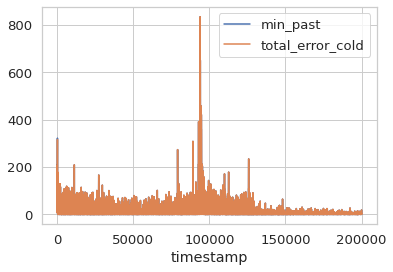

In [414]:
x0 = 0 #190000#test_df.timestamp.min()
x1 = 200000 #test_df.timestamp.max()

p = "min_past"
u = 1
t = 100
df = df_all[(df_all["policy"] == p) & (df_all["ts_factor"] == t) & (df_all["updates"] == u)]
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
print(df.square_error.mean())
df[(df["timestamp"] < x1) & (df["timestamp"] > x0)].groupby(by="timestamp").square_error.sum().plot(label=p) #rolling(1000).mean().plot(xlim=(x0, x1), label=p)
min_past_df = df

p = "total_error_cold"
df = df_all[(df_all["policy"] == p) & (df_all["ts_factor"] == t) & (df_all["updates"] == u)]
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
print(df.square_error.mean())
df[(df["timestamp"] < x1) & (df["timestamp"] > x0)].groupby(by="timestamp").square_error.sum().plot(label=p).legend() #rolling(1000).mean().plot(xlim=(x0, x1), label=p)
total_error_df = df
#p = "total_error"
#df = df_all[(df_all["policy"] == p) & (df_all["ts_factor"] == t) & (df_all["updates"] == u)]
#df["square_error"] = df.y_pred - df.y_true
#df["square_error"] = df["square_error"].apply(lambda x: x*x)
#df[(df["timestamp"] < x1) & (df["timestamp"] > x0) ].groupby(by="timestamp").square_error.sum().rolling(100).mean().plot(label=p).legend() #rolling(1000).mean().plot(xlim=(x0, x1), label=p)


df

In [415]:
min_past_df

,Unnamed: 0,y_true,y_pred,user_id,movie_id,timestamp,policy,updates,ts_factor,square_error
0,0,4,3.990729,4268,1198,0,min_past,1,100,0.000086
1,1,3,4.165281,4268,858,0,min_past,1,100,1.357879
2,2,4,2.750467,4269,588,0,min_past,1,100,1.561334
3,3,4,5.000000,4269,1441,0,min_past,1,100,1.000000
4,4,3,1.935438,4269,3099,0,min_past,1,100,1.133293
...,...,...,...,...,...,...,...,...,...,...
735115,735115,1,2.997377,4958,2399,811517,min_past,1,100,3.989517
735116,735116,5,3.673028,4958,1407,811518,min_past,1,100,1.760855
735117,735117,4,2.525622,4958,1924,811519,min_past,1,100,2.173791
735118,735118,4,3.384733,4958,3264,811519,min_past,1,100,0.378553


In [418]:
diff_df = pd.concat([total_error_df, min_past_df]).drop_duplicates(keep=False, subset=["timestamp", "user_id", "movie_id", "square_error"])

In [431]:
diff_df.groupby(by=["user_id"]).square_error.sum()

user_id
1        24.007399
2       121.406930
3        22.949227
5       173.427297
6        28.832483
           ...    
5978    260.952755
5985      2.539844
5991      0.215681
5996    171.297642
6002     32.530582
Name: square_error, Length: 3849, dtype: float64

In [478]:
update_table = updates_df[(updates_df["ts_factor"] == t) & (updates_df["updates"] == u)]\
                            .groupby(by=["key", "policy"])\
                            .time.apply(np.array)
                            
update_table

key   policy          
1     last_query          [129973, 129974, 129975, 129976, 129980, 12998...
      max_pending         [129973, 129974, 129975, 129976, 129980, 12998...
      min_past            [129973, 129974, 129975, 129976, 129980, 12998...
      round_robin         [129973, 129974, 129975, 129976, 129980, 12998...
      total_error         [129973, 129974, 129975, 129976, 129980, 12998...
                                                ...                        
6040  max_pending         [188930, 321511, 321512, 321513, 321514, 32151...
      min_past            [188930, 321511, 321512, 321513, 321514, 32151...
      round_robin         [188930, 321511, 321512, 321513, 321514, 32151...
      total_error         [188930, 321511, 321512, 321513, 321514, 32151...
      total_error_cold    [188930, 321511, 321512, 321513, 321514, 32151...
Name: time, Length: 28212, dtype: object

In [479]:
update_table.loc[1].loc["last_query"]

array([129973, 129974, 129975, 129976, 129980, 129981, 129987, 129989,
       129990, 129991, 129993, 129994, 129995, 129996, 135215, 135216,
       135217])

In [490]:
df = df_all[(df_all["ts_factor"] == t) & (df_all["updates"] == u)]
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.square_error.max()

/tmp/ipykernel_2322980/1454398426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["square_error"] = df.y_pred - df.y_true
/tmp/ipykernel_2322980/1454398426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["square_error"] = df["square_error"].apply(lambda x: x*x)


16.0

In [495]:
df.groupby(by="policy").square_error.mean()

policy
last_query          1.990268
max_pending         1.329973
min_past            1.177049
round_robin         1.354952
total_error         1.204448
total_error_cold    1.176824
Name: square_error, dtype: float64

In [496]:
df[~df.user_id.isin(past_updates.keys())].groupby(by="policy").square_error.mean()

policy
last_query          2.445971
max_pending         1.426234
min_past            1.180859
round_robin         1.465606
total_error         1.226302
total_error_cold    1.180839
Name: square_error, dtype: float64

In [497]:
df[df.user_id.isin(past_updates.keys())].groupby(by="policy").square_error.mean()

policy
last_query          1.302786
max_pending         1.184751
min_past            1.171301
round_robin         1.188017
total_error         1.171478
total_error_cold    1.170767
Name: square_error, dtype: float64

In [506]:
df.groupby(by="user_id").y_true.count()

user_id
1        312
2        768
3        300
4        126
5       1188
        ... 
6001     180
6002     978
6016     312
6028       6
6040     138
Name: y_true, Length: 4702, dtype: int64

In [488]:
for user_id, group in df.groupby(by=["user_id"]):
    #print(group)
    te = group[group["policy"] == "total_error_cold"].square_error.sum()
    mp = group[group["policy"] == "min_past"].square_error.sum()
    if te > mp*1.1: 
        print(user_id, past_updates[user_id], te, mp)
        print("    total_error", update_table.loc[user_id].loc["total_error_cold"].mean(), update_table.loc[user_id].loc["total_error_cold"].shape)
        print("    min_past", update_table.loc[user_id].loc["min_past"].mean(), update_table.loc[user_id].loc["min_past"].shape)

4315 155 30.564712951630167 23.32621349283489
    total_error 3365.4 (5,)
    min_past 1691.4 (10,)
4911 81 10.517917863426224 2.298363278260674
    total_error 7955.0 (1,)
    min_past 7954.5 (2,)


In [489]:
for user_id, group in diff_df.groupby(by=["user_id"]):
    #print(group)
    te = group[group["policy"] == "total_error_cold"].square_error.sum()
    mp = group[group["policy"] == "min_past"].square_error.sum()
    if te*1.1 < mp: 
        print(user_id, past_updates[user_id] if user_id in past_updates else False, te, mp)
        print("    total_error", update_table.loc[user_id].loc["total_error_cold"].mean(), update_table.loc[user_id].loc["total_error_cold"].shape)
        print("    min_past", update_table.loc[user_id].loc["min_past"].mean(), update_table.loc[user_id].loc["min_past"].shape)

1440 False 0.00018333780036350095 0.0002279791221317936
    total_error 94619.375 (8,)
    min_past 94578.16666666667 (6,)
4269 227 97.5863785054677 260.00145174914826
    total_error 5.0 (11,)
    min_past 4.6 (10,)
4271 526 555.127301697683 1318.6013106748499
    total_error 34.35897435897436 (39,)
    min_past 22.923076923076923 (13,)
4274 153 15.212738366662265 48.101048092043875
    total_error 14.0 (8,)
    min_past 15.0 (12,)
4298 285 216.93841617765224 302.5222019785573
    total_error 1883.8333333333333 (30,)
    min_past 1677.6785714285713 (28,)
4302 233 66.31551004979265 110.17385836547352
    total_error 145346.1379310345 (29,)
    min_past 145346.1379310345 (29,)
4310 266 108.58889048926545 119.47167410842088
    total_error 134610.79411764705 (34,)
    min_past 130778.42857142857 (35,)
4315 155 9.239932277829727 16.826887618467474
    total_error 3365.4 (5,)
    min_past 1691.4 (10,)
4335 484 78.26652562709009 200.08717137836925
    total_error 2038.439024390244 (41,)
   

In [ ]:
x0 = test_df.timestamp.min()
x1 = test_df.timestamp.max()

p = "max_pending"
u = 1
t = 100
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
#df.groupby(by="timestamp").square_error.mean().rolling(1000).mean().plot(xlim=(x0, x1))

p = "total_error_cold"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().expanding().sum().plot(xlim=(x0, x1), label=p)


p = "min_past"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().expanding().sum().plot(xlim=(x0, x1), label=p).legend()

p = "max_pending"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().expanding().sum().plot(xlim=(x0, x1), label=p).legend()

p = "round_robin"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().expanding().sum().plot(xlim=(x0, x1), label=p).legend()



df

In [ ]:
p = "min_past"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df[df["y_pred"] > 10]

In [ ]:
x0 = test_df.timestamp.min()
x1 = 1000 #100000


p = "min_past"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().rolling(1).mean().plot(xlim=(x0, x1), label=p).legend()


In [ ]:
p = "total_error_cold"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().rolling(1).mean().plot(xlim=(x0, x1), label=p).legend()
#df[df["square_error"] > 100]

In [ ]:
import pickle

movie_features = pickle.load(open(f"{result_dir}/train_movie_features.pkl", "rb"))
user_features = pickle.load(open(f"{result_dir}/train_user_features.pkl", "rb"))
past_updates = pickle.load(open(f"{result_dir}/past_updates.pkl", "rb"))

In [ ]:
from workloads.recsys.stream_als import  predict_user_movie_rating

In [ ]:
movie_features[481][-1]

In [ ]:
predict_user_movie_rating(user_features[4312], movie_features[481])

In [ ]:
train_df[train_df["movie_id"] == 481]

In [ ]:
test_df.groupby(by="timestamp").user_id.nunique().rolling(window=1000).mean().plot()

In [ ]:
test_df.groupby(by="timestamp").user_id.nunique().plot(xlim=(x0, x1))

In [ ]:
test_df.groupby(by="timestamp").user_id.nunique().rolling(window=1000).mean().plot(xlim=(x0, x1))

In [ ]:
test_df.groupby(by="timestamp").count().plot(xlim=(x0, x1))#.rolling(window=100).mean().plot()

In [ ]:
test_df.groupby(by="timestamp").count().rolling(window=1).mean().plot(xlim=(x0, x1))